In [1]:
import numpy as np
import pandas as pd

In [2]:
road_df = pd.read_csv('./data/major_road_data.csv').set_index(['OBJECTID'])

In [3]:
road_df.head(10)

,RoadWidth,sidewalk_width,public_transport,has_utilities,people_flow,tree_density
OBJECTID,,,,,,
1,0.137845,0.0,0.333333,0.0,0.0,0.0
4,0.106999,0.0,0.333333,0.0,0.0,0.0
5,0.118974,0.0,0.333333,0.0,0.0,0.0
7,0.107270,0.0,0.333333,0.0,0.0,0.0
9,0.111588,0.0,0.333333,0.0,0.0,0.0
11,0.110725,0.0,0.333333,0.0,0.0,0.0
13,0.152070,0.0,0.333333,0.0,0.0,0.0
15,0.104363,0.0,0.333333,0.0,0.0,0.0
17,0.131074,0.0,0.333333,0.0,0.0,0.0


In [4]:
y = road_df.iloc[:, 0]
X = road_df.iloc[:, 1:]

In [5]:
X.columns

Index(['sidewalk_width', 'public_transport', 'has_utilities', 'people_flow',
       'tree_density'],
      dtype='object')

In [6]:
X.describe()

,sidewalk_width,public_transport,has_utilities,people_flow,tree_density
count,7666.000000,7666.000000,7666.000000,7666.000000,7666.000000
mean,0.141198,0.783155,0.611662,0.110770,0.046118
std,0.100030,0.249513,0.487404,0.115217,0.076976
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082658,0.666667,0.000000,0.020217,0.000000
50%,0.130623,0.666667,1.000000,0.077843,0.006927
75%,0.193282,1.000000,1.000000,0.170248,0.071828
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y.agg(['min', 'median', 'mean', 'max', 'std', 'var'])

min       0.000000
median    0.100534
mean      0.148932
max       1.000000
std       0.121888
var       0.014857
Name: RoadWidth, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
SSE = []
score = []
for i in range(2, 9):
    estimator = KMeans(n_clusters=i, random_state=41).fit(X)
    SSE.append(estimator.inertia_)
    score.append(silhouette_score(X, estimator.labels_))

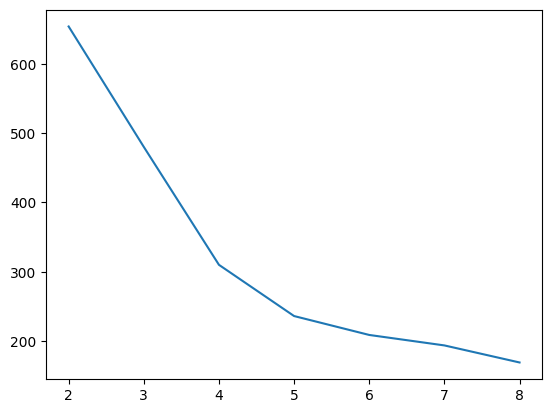

In [11]:
plt.plot(range(2, 9), SSE)

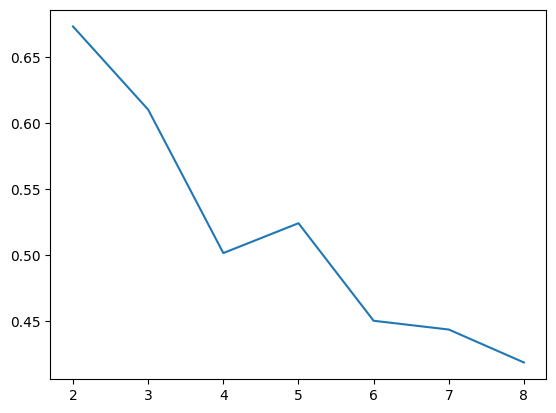

In [12]:
plt.plot(range(2, 9), score)

In [13]:
estimator = KMeans(n_clusters=5, random_state=31).fit(X)
estimator.labels_

array([4, 4, 4, ..., 1, 2, 2], dtype=int32)

In [14]:
road_df['cluster_id'] = estimator.labels_

In [15]:
import plotly.graph_objects as go

In [16]:
fig = go.Figure()

for i in range(estimator.n_clusters):
    fig.add_trace(go.Scatterpolar(
        r = estimator.cluster_centers_[i],
        theta = X.columns,
        fill = 'toself',
        name = i
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
)

fig.show()